In [82]:
# 순환 신경망으로 IMDB 리뷰 분류하기

from keras.datasets import imdb #imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류한 샘플, 총 50000개의 샘플이고 훈련과 테스트에 각각 25000개 (이미 문자는 정수로 변환됨)
 
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=200)  #전체 데이터셋에서 단어 200개만 사용

In [83]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [84]:
print(len(train_input[0])) # 첫번째 리뷰의 길이 출력, 218개의 토큰(영어 문장을 소문자로 바꾸고 구둣점을 삭제한 후 공백 기준으로 분리)으로 구성

218


In [85]:
print(len(train_input[1])) # 두번쨰 리뷰의 길이 출력, 189개의 토큰으로 구성

189


In [86]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [87]:
print(train_target[:20]) #이진분류, 0은 부정, 1은 긍정

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [88]:
from sklearn.model_selection import train_test_split   # 검증세트로 20% 떼놈, 훈련세트는 20,000개
from sympy import randMatrix
train_input, val_input, train_target, val_target=train_test_split(
    train_input, train_target, test_size= 0.2, random_state=42)       


In [89]:
import numpy as np 

lengths = np.array([len(x) for x in train_input]) #test_input에 있는 리뷰의 길이들을 lenghts에 numpy 배열로 저장

In [90]:
print(np.mean(lengths), np.median(lengths)) #평균 단어 개수와 중간값

239.00925 178.0


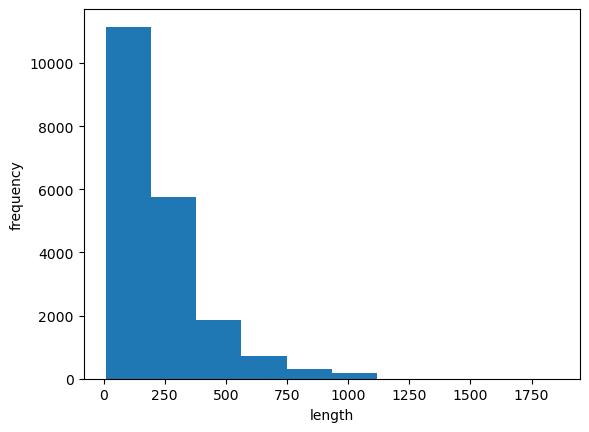

In [91]:
import matplotlib.pyplot as plt   #히스토그램으로 lengths 배열 확인
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [92]:
from keras.preprocessing.sequence import pad_sequences  #pad_sequence()함수를 사용해서 시퀸스 데이터 길이 맞추기
train_seq = pad_sequences(train_input, maxlen=100) # train_input 데이터에서 길이를 100으로 맞춤, 100보다 길면 잘라내고, 짧으면 0으로 패딩

In [93]:
print(train_seq.shape)

(20000, 100)


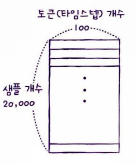

In [94]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [95]:
print(train_input[0][-10:]) # 원본 샘플 [0]의 마지막 10개 토큰 출력 #일반적으로 앞부분을 자름(일반적으로 시퀸스 뒷부분의 정보가 앞부분 보다 유용할 것이라 기대해서)
                            # 매개변수로 자르는 방향 조절 가능, truncating 매개변수 값을 기본값 'pre'가 아닌 'post'로 변경

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [96]:
print(train_seq[5]) # padding 매개변수의 기본값 'pre'를 'post'로 변경하여 뒤부분에 패딩 추가(but 뒷 패딩은 셀의 은닉상태에 가장 큰 영향을 미춰서 선호x)

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


In [97]:
print(train_input[5][-10:])

[2, 2, 2, 2, 46, 48, 64, 18, 4, 2]


In [98]:
val_seq = pad_sequences(val_input, maxlen=100) #검증세트도 100으로 맞춤

#### 순환 신경망 만들기

* 케라스는 여러 종류의 순환층 클래스 제공
* SimpleRNN 클래스가 가장 간단한 모델
* IMDB는 이진분류이고 마지막 출력층 1개의 뉴런을 가지고 시그모이드 활성화 함수를 사용

In [99]:
import keras

model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,200)))              #100은 토큰 개수, 훈련 데이터에 포함될 수 있는 정수값의 범위는 0(패딩토큰)에서 199까지(우리가 imdb.load_data에서 200개 단어를 지정)
model.add(keras.layers.SimpleRNN(8))                        #활성화함수=tanh 
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [100]:
train_oh = keras.utils.to_categorical(train_seq)  #train_seq를 원-핫 인코딩으로 배열 변경 

# why? 문자의 숫자값 ex) I -> 20, am -> 15 일때 정수값엔 숫자의 크기 속성이 적용됨 (but 여기선 숫자의 크기는 아무 의미가 없음)
# 따라서 원-핫 인코딩으로 정수값에 있는 크기 속성을 없애고 각 정수를 고유하게 표현

In [101]:
print(train_oh)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 1. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]

 [[0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  ...
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]]


In [102]:
print(train_oh.shape) # 정수 하나마다 200차원의 배열로 변경됨, 1차원 정수배열 (100,)에서 2차원(100,200)로 변경  --> model.add(keras.layers.Input(shape=(100,200)))  그래서 shape이 100,200

(20000, 100, 200)


In [103]:
print(train_oh[0][0][:12]) #첫번째 토큰 인코딩 확인

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [104]:
print(np.sum(train_oh[0][0]))  #모든 원소의 값을 더해서 1이 되는지 확인, 열한번쨰 원소만 1이고 나머지는 다 0ㅍ

1.0


In [105]:
val_oh=keras.utils.to_categorical(val_seq)  # 검증세트도 원-핫 인코딩

In [106]:
model.summary()

# 가중치 = 200 * 8(순환층)  = 1600
# 은닉층 가중치 = 8 * 8 = 64
# 절편 = 8
# 모델 파라미터 = 1600+64+8= 1672

# 최종 훈련모델 = train_oh
# 최종 검증모델 = val_oh

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

#### 순환 신경망 훈련하기

In [107]:

model.compile(optimizer= 'adam', loss='binary_crossentropy',
             metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                                  restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5027 - loss: 0.7006 - val_accuracy: 0.5162 - val_loss: 0.6913
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5397 - loss: 0.6873 - val_accuracy: 0.5442 - val_loss: 0.6858
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5483 - loss: 0.6853 - val_accuracy: 0.5580 - val_loss: 0.6813
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5682 - loss: 0.6772 - val_accuracy: 0.5828 - val_loss: 0.6710
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6017 - loss: 0.6575 - val_accuracy: 0.6692 - val_loss: 0.6139
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6712 - loss: 0.6120 - val_accuracy: 0.6686 - val_loss: 0.6090
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6928 - loss: 0.5906 - val_accuracy: 0.7090 - val_loss: 0.5788
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7159 - loss: 0.5647 - 

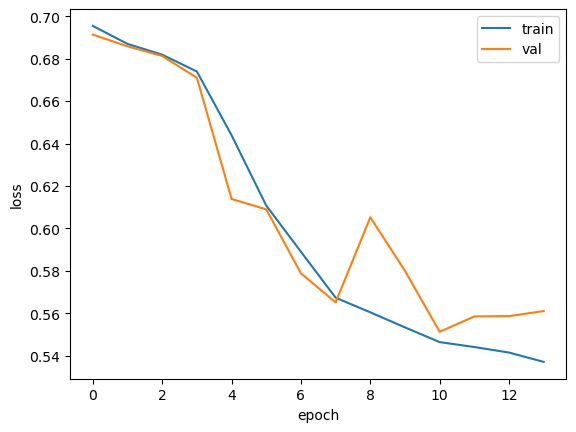

In [108]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [109]:
# 원-핫 인코딩의 단점은 입력 데이터가 엄청 커짐

print(train_seq.nbytes, train_oh.nbytes)   #train_seq는 8M,train _oh는 3.2G

8000000 3200000000


#### 단어 임베딩을 사용하기

* 단어임베딩: 각 단어를 고정된 크기의 실수 벡터로 번경, 자연어 처리에 더 좋은 성능

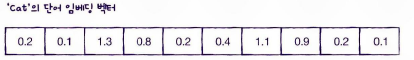

* 원-핫 인코딩과 달리 훨씬 작은 크기로 단어 잘 표헌, 메모리 절약, 더 많은 단어 사용

In [110]:
(train_input, train_target),(test_input, test_target) =imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [114]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [115]:
print(val_seq[0])

[ 32   2 225   6   2   2 496   4   2   2   7  14  22  15 100  28   2  11
   4   2   7   6 329   2   2 472  51  75 130  56  19   9   2   2 105   2
   2   2 186   8  30   8 168 307  33   4 454   8  97   4   2   2  53   2
   6   2 229  38   2   2  17   8   2   4   2   2  46   4 414   5 450   2
   2  15   2 117  53  74  11  31   2  35  23 268   2  34 167   2  14   9
   2  22 231  11 450   2   2  14  58   2]


In [116]:
model_emb = keras.Sequential()
model_emb.add (keras.layers.Input(shape=(100,)))
model_emb.add (keras.layers.Embedding(500, 16))     #(500) 어휘 사전 크기, 이 데이터셋에 있는 고유한 토큰의 개수는 총 500개, 임베딩 층의 첫 번쨰 매개변수, 
                                                      #(16) 임베딩의 벡터 크기
model_emb.add (keras.layers.SimpleRNN(8))
model_emb.add (keras.layers.Dense(1, activation='sigmoid'))

In [117]:
model_emb.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
model_emb.compile(optimizer= 'adam', loss='binary_crossentropy',
             metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                                  restore_best_weights=True)
history = model_emb.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5979 - loss: 0.6602 - val_accuracy: 0.7472 - val_loss: 0.5393
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7503 - loss: 0.5220 - val_accuracy: 0.7644 - val_loss: 0.4993
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7892 - loss: 0.4644 - val_accuracy: 0.7626 - val_loss: 0.5024
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7889 - loss: 0.4569 - val_accuracy: 0.7690 - val_loss: 0.4846
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8124 - loss: 0.4241 - val_accuracy: 0.7768 - val_loss: 0.4759
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8158 - loss: 0.4202 - val_accuracy: 0.7790 - val_loss: 0.4725
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8262 - loss: 0.4006 - val_accuracy: 0.7782 - val_loss: 0.4779
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8250 - loss: 0.4009 - 

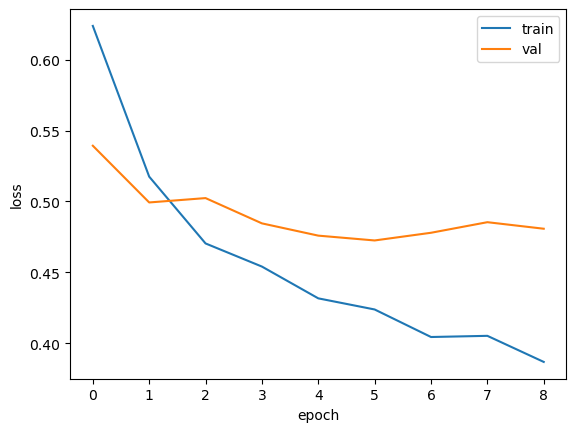

In [120]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()